# 3. Train a Model with Different Optimizers

Task: Train MNIST Model with Adam & SGD(Stochastic Gradient Descent)

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [19]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
def build_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [21]:
# Model with Adam Optimizer
adam_model = build_model(optimizer='adam')
history_adam = adam_model.fit(x_train, y_train, epochs=10, 
                              validation_data=(x_test, y_test), verbose=0)

# Model with SGD Optimizer
sgd_model = build_model(optimizer='sgd')
history_sgd = sgd_model.fit(x_train, y_train, epochs=10, 
                            validation_data=(x_test, y_test), verbose=0)


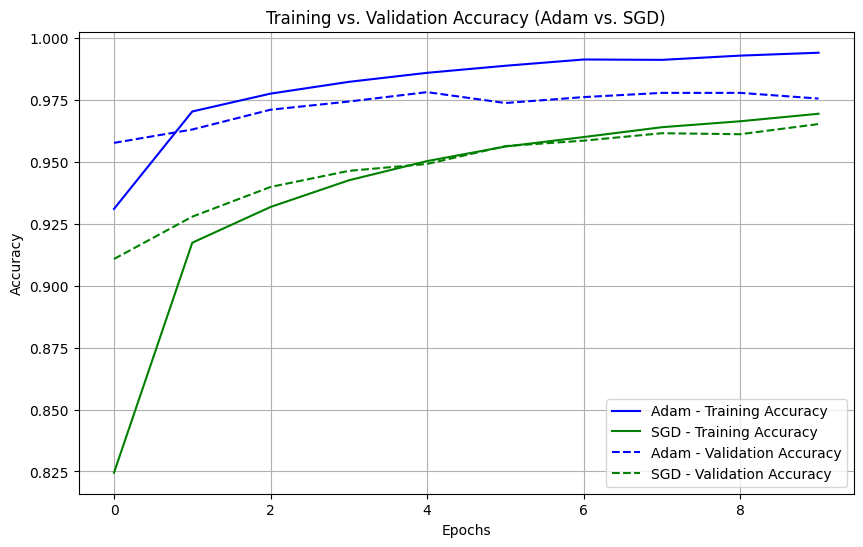

In [22]:
# Plotting the Accuracy
plt.figure(figsize=(10, 6))

# Training Accuracy
plt.plot(history_adam.history['accuracy'], label='Adam - Training Accuracy', color='blue')
plt.plot(history_sgd.history['accuracy'], label='SGD - Training Accuracy', color='green')

# Validation Accuracy
plt.plot(history_adam.history['val_accuracy'], '--', label='Adam - Validation Accuracy', color='blue')
plt.plot(history_sgd.history['val_accuracy'], '--', label='SGD - Validation Accuracy', color='green')

plt.title('Training vs. Validation Accuracy (Adam vs. SGD)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
